# Stitching Trajecrories Example:

This texample uses an implementation for a trajectory segments conection algorithm. The algorithm is defined by 

H. Xu, Tracking Lagrangian trajectories in position–velocity space, Meas. Sci. Technol. 19 (2008) 075105 (10pp) 


# Initialization:

##### Imports:

In [59]:
import numpy as np
np.set_printoptions(precision=3)

from matplotlib.ticker import FormatStrFormatter
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from matplotlib.legend import Legend

from __future__ import print_function
import future        # pip install future

from utils import *

##### Figure Formats:

In [60]:
%matplotlib inline

params = {'legend.fontsize': 13,#'x-large',
          'figure.figsize': (7.2, 4.45),#(6, 4.5),
         'axes.labelsize':17,#'xx-large',
         'axes.titlesize':16,#'xx-large',
         'xtick.labelsize':16,#'xx-large',
         'ytick.labelsize':16,#'xx-large',
         'font.size':15,
         'mathtext.fontset': 'stix',
         'font.family': 'STIXGeneral',
         # 'font.family': ['serif'],
         # 'font.sans-serif' : 'Computer Modern Roman',
         'grid.color': '#c1c1c1',
         'text.usetex' : 'False', # set True and see if it works for your LaTeX installation
         'legend.framealpha' : '1.0',
         'lines.markersize': 6,
         'lines.markeredgewidth': '0.5'}

    
pylab.rcParams.update(params)


colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
shapes = ['X','o', 'd', 'v', '^', '<', '>', 'P', '8', 's', 'p', '*', 'h', 'H', 'D']

#### Load Trajectories to Ram:


In [61]:
file_path = 'EX3915.h5'
traj_list = get_traj_list(file_path)


print('%d trajectories'%(len(traj_list)))

261 trajectories


In [62]:
#get the "recording" frame rate
FPS = len(traj_list[0]) / 4.0
print('%.f fps'%FPS)

2 fps


# Use the x-v retrackng algorithm:

We now show how to use the Xu (2008) algorithm implemented here 
in order to re connect the broken trajectory segments we just perpared above.

In [65]:
# import the traj connector:
from xv_retracking import Traj_Conector

#set the algorithm parameters:
Ts = 0.1/FPS #search time
dm = 0.005 #maximum distance for connection


# setup the trajectory connector:
TC = Traj_Conector(traj_list, Ts, dm)

# make the traj connector find broken segments:
TC.make_new_traj_list()

Once we ran the last code line (TC.make_new_traj_list()) we have effectively searched the list of broken trajectories and connected the pairs that the algoritm had found. The list of the new connected trajectories can be accessed by:


In [66]:
new_connected_tra_list = TC.new_t    # a list of connected trajectories
print('%d connected trajectories'%(len(new_connected_tra_list)))

254 connected trajectories


We can visualize the new connected trajectories using the following builtin function.

Blue markers show the trajectory segments. 

Red dots show trajectories that were connected and the interpolated missing data in-between the two segments.

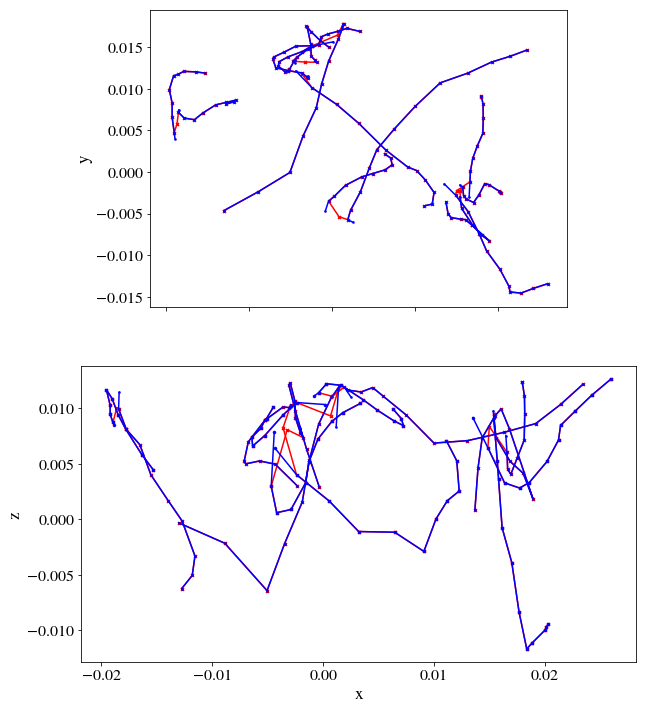

In [67]:
fig, ax = TC.plot_connected_trajectories()
fig.set_size_inches(12,12)

In [68]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from flowtracks.io import iter_trajectories_ptvis
%matplotlib inline

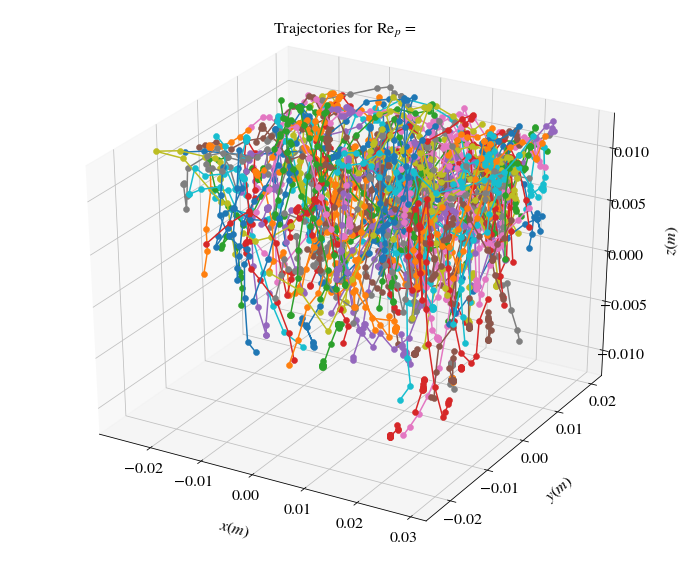

In [69]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
plt.title('Trajectories for Re$_p$ = ', fontsize=16, pad=20)
for tr in new_connected_tra_list: # generate one trajectory per loop call
    plt.plot(tr.pos()[:,0],tr.pos()[:,1],tr.pos()[:,2], '-o')
    ax.set_xlabel('$x(m)$',fontsize=16, labelpad=20)
    ax.set_ylabel('$y(m)$',fontsize=16, labelpad=20)
    ax.set_zlabel('$z(m)$',fontsize=16, labelpad=20)

# Notes:

1. The results of the algot=rithm will naturally depend on the values of the parameters Ts and dm. See the paper by Xu (2008) for a thorough description and a propper bootstraping.

2. Runneing the algorithm over long lists of trajectories may be computationally heavy so bear this in mind. A way around this may be to divided the initial list of trajectories into a number of sublists with fewer trajectories, and then running the algorithm on each of them separately. The script xv_retracking.py provides a function that does this operation:  iterate_traj_connector(). See the srcipt for documentation.